In [9]:
from sys import path
path.append('./include/')
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Graph
import include.Node as Node
import include.C2_utils as c2u

### Tree generation
$\ell$ can only take values ranging from 1 to height-1 as is defined (level enumeration starts from 0).

In [2]:
levs=5  # levels of the tree
ell_ensemble = []

for ell in range(1,levs):
    ell_ensemble.append( c2u.CommandGeneration(levs=levs, ell=ell) )  # an ensemble of different ell.
    # Each tree has been generated 100 times in ell_ensmble for averaging purposes of the random walker
    # in the postprocessing.

In [3]:
Sample = ell_ensemble[3][0]

### Simple matplotlib representation

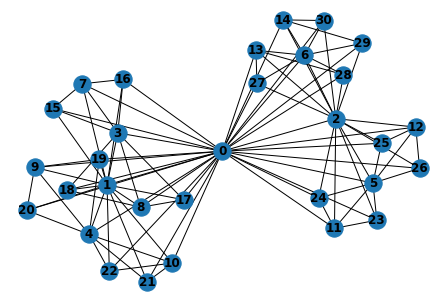

In [4]:
nx.draw(Sample, with_labels=True, font_weight='bold')

### Employing Graphviz to visualize the tree (change $\ell$ in its generation for different graphs)

In [5]:
dotinit = Graph(comment='Initial Structure')

for i in Sample.nodes():
    dotinit.node(str(Sample.nodes[i]['ID']), 'x' + str(Sample.nodes[i]['ID']))

for i in Sample.edges():
    dotinit.edge( str(i[0]),  str(i[1]), constraint='true' )

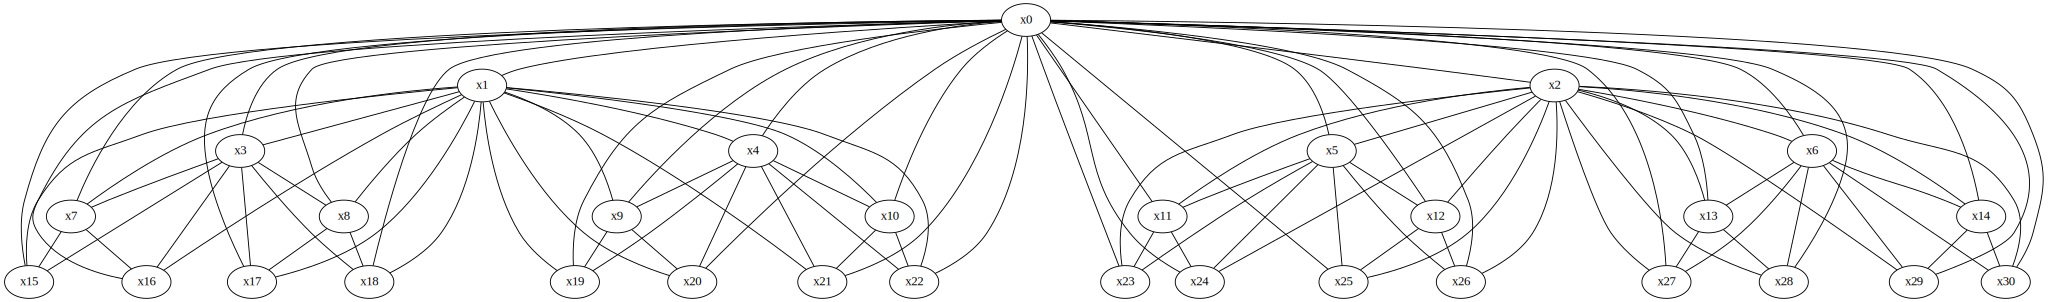

In [6]:
dotinit

## Applying external and internal failures: median and average number of survivng connected components (CCs), and the average total number of nodes of a graph, as follows from the ensemble

In [13]:
TreeEnsemble = c2u.PrunedEnsemble(hmin=6, hmax=7, ExtF=0.05)
CCInfo = c2u.CCNosANDSizes(TreeEnsemble)

### Setting up the plots of average number of nodes of graphs and their average number of CCs

In [15]:
height = {}
heights = [6]  # CUSTOMIZE

for h in heights:
    barh, Ns = [], []
    for ell in range(1,h):
        kwd = 'h=' + str(h) + ', ell=' + str(ell)
        barh.append( int(np.round(CCInfo[kwd][1])) )
        Ns.append( CCInfo[kwd][3] )
        
    height[h] = [barh, Ns]

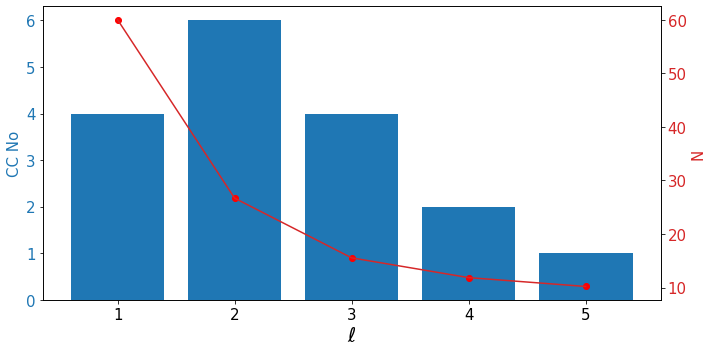

In [16]:
for h in heights:
    ell = list(range(1,h))
    
    fig, ax1 = plt.subplots(figsize=(10,5))

    color = 'tab:blue'
    ax1.set_xlabel(r'$\ell$', fontsize=20)
    ax1.set_ylabel('CC No', color=color, fontsize=15)  # we already handled the x-label with ax1
    ax1.bar(ell, height[h][0], color=color)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
    ax1.tick_params(axis='x', labelsize=15)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('N', color=color, fontsize=15)
    ax2.plot(ell, height[h][1], color=color)
    ax2.scatter(ell, height[h][1], marker='o', c='r')
    ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

## Sample drawing of a pruned structure

In [25]:
Sample = TreeEnsemble['h=6, ell=2'][0]

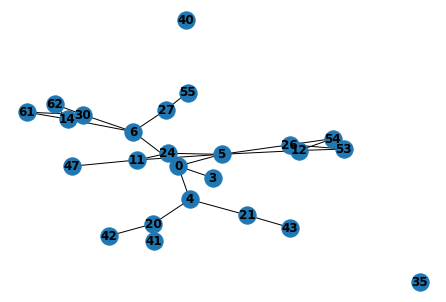

In [26]:
nx.draw(Sample, with_labels=True, font_weight='bold')